In [1]:
import numpy as np
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1.  what <code>funs_generate_network.get_network()</code> does?

In [35]:
df = pd.read_excel('./data/dikeIjssel.xlsx', dtype = object)
df = df.set_index('NodeName')
df

,OBJECTID,prec_node,km,branch,type,dikelevel,hground,dike_ring,traject_id,c,b,lambda,traj_ratio
NodeName,,,,,,,,,,,,,
A.0,0,NaN,NaN,NaN,upstream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.1,1,A.0,903,A,dike,931.669,9.5,49,2,28.57,0.2,0.00336,1
A.2,2,A.1,922,A,dike,784.469,7.7,52,1,124.2,0.61,0.00336,0.27444
A.3,3,A.2,932,A,dike,909,6.6,50,2,18.58,0.04,0.00336,1
A.4,4,A.3,940,A,dike,678.626,5.6,51,1,5.41,0.05,0.00336,1
A.5,5,A.4,947,A,dike,736.45,4.8,53,1,22.71,0.07,0.00336,1
A.6,6,A.5,NaN,A,downstream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
nodes = df.to_dict('index')
nodes

{'A.0': {'OBJECTID': 0,
  'b': nan,
  'branch': nan,
  'c': nan,
  'dike_ring': nan,
  'dikelevel': nan,
  'hground': nan,
  'km': nan,
  'lambda': nan,
  'prec_node': nan,
  'traj_ratio': nan,
  'traject_id': nan,
  'type': 'upstream'},
 'A.1': {'OBJECTID': 1,
  'b': 0.2,
  'branch': 'A',
  'c': 28.57,
  'dike_ring': 49,
  'dikelevel': 931.668701172,
  'hground': 9.5,
  'km': 903,
  'lambda': 0.00336,
  'prec_node': 'A.0',
  'traj_ratio': 1,
  'traject_id': 2,
  'type': 'dike'},
 'A.2': {'OBJECTID': 2,
  'b': 0.61,
  'branch': 'A',
  'c': 124.2,
  'dike_ring': 52,
  'dikelevel': 784.469238281,
  'hground': 7.7,
  'km': 922,
  'lambda': 0.00336,
  'prec_node': 'A.1',
  'traj_ratio': 0.27443976905763773,
  'traject_id': 1,
  'type': 'dike'},
 'A.3': {'OBJECTID': 3,
  'b': 0.04,
  'branch': 'A',
  'c': 18.58,
  'dike_ring': 50,
  'dikelevel': 909,
  'hground': 6.6,
  'km': 932,
  'lambda': 0.00336,
  'prec_node': 'A.2',
  'traj_ratio': 1,
  'traject_id': 2,
  'type': 'dike'},
 'A.4': {'O

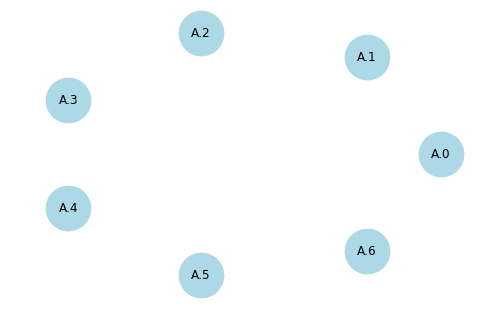

In [37]:
G = nx.MultiDiGraph()
for key, attr in nodes.items():
    G.add_node(key, **attr)

nx.draw_circular(G,
    node_color = "lightblue",
    node_size=2000,
    with_labels=True)

In [38]:
# A.0 and A.6 are respectively upstream and downstream
dike_list = df['type'][df['type'] == 'dike'].index.values
dike_list

array(['A.1', 'A.2', 'A.3', 'A.4', 'A.5'], dtype=object)

In [54]:
# dike_branches = {k: df[df['branch'] == k].index.values for k in np.unique(df['branch'].values)}
dike_branches = {k: df[df['branch'] == k].index.values for k in df['branch'].unique()}
dike_branches

{'A': array(['A.1', 'A.2', 'A.3', 'A.4', 'A.5', 'A.6'], dtype=object),
 nan: array([], dtype=object)}

In [8]:
df["branch"].unique()

array([nan, 'A'], dtype=object)

In [9]:
pd.read_excel('./data/fragcurves/frag_curves.xlsx', header = None, index_col = 0).transpose().head()

,wl,52001013,50001010,51002006,52002004,53003009,53003008
1,0.0,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20
2,0.1,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20
3,0.2,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20
4,0.3,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20
5,0.4,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20,6.680000e-20


In [10]:
frag_curves = pd.read_excel('./data/fragcurves/frag_curves.xlsx', header = None, index_col = 0).transpose()

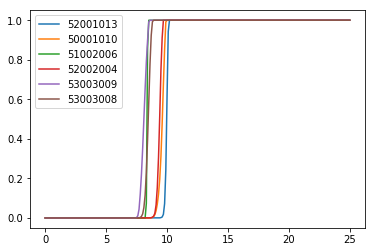

In [11]:
for col in frag_curves.columns[1:]:
    plt.plot(frag_curves["wl"], frag_curves[col], label = col)
plt.legend()

In [12]:
pd.read_excel('./data/fragcurves/calfactors_pf1250.xlsx').head()

,mean
A.1,1.177979
A.2,0.043945
A.3,-1.125488
A.4,-1.674805
A.5,-2.324219


In [13]:
calibration_factors = pd.read_excel('./data/fragcurves/calfactors_pf1250.xlsx')

In [14]:
pd.read_excel('./data/rfr_strategies.xlsx', index_col = 0, names = range(5))

,0,1,2,3,4
Project name,,,,,
A.1,0.19,0.17,NaN,NaN,NaN
A.2,NaN,NaN,0.05,0.02,NaN
A.3,NaN,NaN,0.11,0.04,0.01
A.4,NaN,NaN,NaN,0.06,0.05
A.5,NaN,NaN,NaN,0.12,NaN
costs_1e6,84.60,217.80,30.70,121.20,256.10


In [15]:
G.node["A.1"]

{'OBJECTID': 1,
 'b': 0.2,
 'branch': 'A',
 'c': 28.57,
 'dike_ring': 49,
 'dikelevel': 931.668701172,
 'hground': 9.5,
 'km': 903,
 'lambda': 0.00336,
 'prec_node': 'A.0',
 'traj_ratio': 1,
 'traject_id': 2,
 'type': 'dike'}

In [16]:
def to_dict_dropna(data):
    return dict((str(k), v.dropna().to_dict()) for k, v in pd.compat.iteritems(data))

In [17]:
# Upload room for the river projects:
G.add_node('RfR_projects', **to_dict_dropna(
            pd.read_excel('./data/rfr_strategies.xlsx', index_col = 0, 
                            names = range(5))))
G.node['RfR_projects']['type'] = 'measure'

# Upload evacuation policies:
G.add_node('EWS', **pd.read_excel('./data/EWS.xlsx').to_dict())
G.node['EWS']['type'] = 'measure'

In [18]:
G.node["RfR_projects"]

{'0': {'A.1': 0.19, 'costs_1e6': 84.6},
 '1': {'A.1': 0.17, 'costs_1e6': 217.8},
 '2': {'A.2': 0.05, 'A.3': 0.11, 'costs_1e6': 30.7},
 '3': {'A.2': 0.02, 'A.3': 0.04, 'A.4': 0.06, 'A.5': 0.12, 'costs_1e6': 121.2},
 '4': {'A.3': 0.01, 'A.4': 0.05, 'costs_1e6': 256.1},
 'type': 'measure'}

In [19]:
G.node["EWS"]

{'days': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'evacuees': {0: 0.0, 1: 0.64, 2: 0.85, 3: 0.88, 4: 0.88},
 'type': 'measure'}

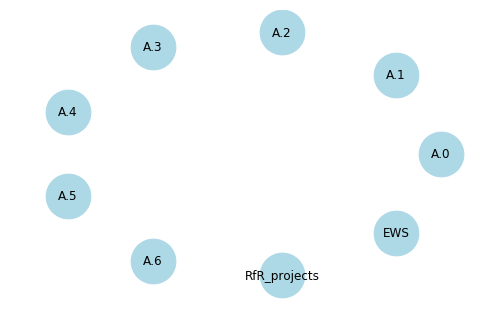

In [20]:
nx.draw_circular(G,
    node_color = "lightblue",
    node_size=2000,
    with_labels=True)

In [21]:
pd.read_excel('./data/Muskingum/params.xlsx')

,K,X,C1,C2,C3
A.0,0.378929,-1.055501,0.703704,0.078224,0.218072
A.1,0.101616,-3.846220,0.897611,0.109992,-0.007603
A.2,0.189157,-1.789507,0.815934,0.157157,0.026909
A.3,0.303710,-0.013471,0.624029,0.613900,-0.237929
A.5,0.779782,0.074716,0.361629,0.457023,0.181347
A.4,0.303710,-0.013471,0.624029,0.613900,-0.237929


In [22]:
Muskingum_params = pd.read_excel('./data/Muskingum/params.xlsx')

In [23]:
def Lookuplin(MyFile, inputcol, searchcol, inputvalue):
    ''' Linear lookup function '''
    
    minTableValue=min(MyFile[:,inputcol])
    maxTableValue=max(MyFile[:,inputcol])
    
    if inputvalue >= maxTableValue: 
        inputvalue=maxTableValue-0.01 
    if inputvalue < minTableValue:
        inputvalue=minTableValue+0.01
        
    A = max(MyFile[MyFile[:,inputcol] <= inputvalue,inputcol])
    B = min(MyFile[MyFile[:,inputcol] > inputvalue,inputcol]) 
    C = max(MyFile[MyFile[:,inputcol] == A,searchcol]) 
    D = min(MyFile[MyFile[:,inputcol] == B,searchcol])
    
    outpuvalue = C-((D-C)*((inputvalue-A)/(A-B)))*1.0
    
    return outpuvalue

In [24]:
for dike in dike_list:
        # Assign fragility curves, assuming it's the same shape for every location
        dikeid = 50001010
        G.node[dike]['f'] = np.column_stack((frag_curves.loc[:,'wl'].values, 
                                             frag_curves.loc[:,dikeid].values))
        # Adjust fragility curves
        G.node[dike]['f'][:,0] += calibration_factors.loc[dike].values
        
        # Determine the level of the dike        
        G.node[dike]['dikelevel'] = Lookuplin(G.node[dike]['f'], 1, 0, 0.5)
        
        # Assign stage-discharge relationships
        filename = './data/rating_curves/{}_ratingcurve_new.txt'.format(dike)               
        G.node[dike]['r'] = np.loadtxt(filename)
        
        # Assign losses per location:
        name = './data/losses_tables/{}_lossestable.xlsx'.format(dike)
        G.node[dike]['table'] = pd.read_excel(name).values
        
        # Assign Muskingum paramters:        
        G.node[dike]['C1'] = Muskingum_params.loc[G.node[dike]['prec_node'], 'C1']
        G.node[dike]['C2'] = Muskingum_params.loc[G.node[dike]['prec_node'], 'C2']
        G.node[dike]['C3'] = Muskingum_params.loc[G.node[dike]['prec_node'], 'C3']

In [25]:
dike

'A.5'

In [26]:
G.node["A.2"]

{'C1': 0.8976112018759458,
 'C2': 0.1099915720737832,
 'C3': -0.007602773949729169,
 'OBJECTID': 2,
 'b': 0.61,
 'branch': 'A',
 'c': 124.2,
 'dike_ring': 52,
 'dikelevel': 9.65500527692471,
 'f': array([[4.39453125e-02, 6.68000000e-20],
        [1.43945313e-01, 6.68000000e-20],
        [2.43945313e-01, 6.68000000e-20],
        [3.43945312e-01, 6.68000000e-20],
        [4.43945313e-01, 6.68000000e-20],
        [5.43945312e-01, 6.68000000e-20],
        [6.43945312e-01, 6.68000000e-20],
        [7.43945312e-01, 6.68000000e-20],
        [8.43945313e-01, 6.68000000e-20],
        [9.43945313e-01, 6.68000000e-20],
        [1.04394531e+00, 6.68000000e-20],
        [1.14394531e+00, 6.68000000e-20],
        [1.24394531e+00, 6.68000000e-20],
        [1.34394531e+00, 6.68000000e-20],
        [1.44394531e+00, 6.68000000e-20],
        [1.54394531e+00, 6.68000000e-20],
        [1.64394531e+00, 6.68000000e-20],
        [1.74394531e+00, 6.68000000e-20],
        [1.84394531e+00, 6.68000000e-20],
      

In [27]:
pd.read_excel('./data/hydrology/wave_shapes.xls').head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.224895,0.214304,0.224283,0.230353,0.219234,0.203512,0.191063,0.187472,0.224432,0.325306,...,0.487914,0.416368,0.352370,0.298759,0.265009,0.231677,0.219614,0.209021,0.199499,0.190946
1,0.273724,0.264464,0.258063,0.282115,0.334478,0.382453,0.404076,0.399115,0.399158,0.416695,...,0.640464,0.581705,0.517591,0.471392,0.431625,0.317330,0.298909,0.286502,0.281432,0.281160
2,0.142807,0.111245,0.092054,0.084458,0.083052,0.084611,0.089789,0.117994,0.218844,0.359502,...,0.405395,0.332713,0.283203,0.253713,0.243552,0.244920,0.251207,0.261964,0.272485,0.276548
3,0.322389,0.291245,0.265126,0.243159,0.226207,0.221248,0.243066,0.284168,0.366145,0.513192,...,0.581041,0.493294,0.410575,0.311241,0.273744,0.248766,0.231748,0.219752,0.211236,0.204669
4,0.415504,0.401833,0.382493,0.366031,0.353424,0.342985,0.329513,0.318997,0.323171,0.351816,...,0.382906,0.336599,0.359547,0.435538,0.518725,0.545424,0.535157,0.514660,0.501379,0.493753


In [28]:
G.node['A.0']['Qevents_shape'] = pd.read_excel('./data/hydrology/wave_shapes.xls')
G.add_node('discount rate', **{'value': 0})

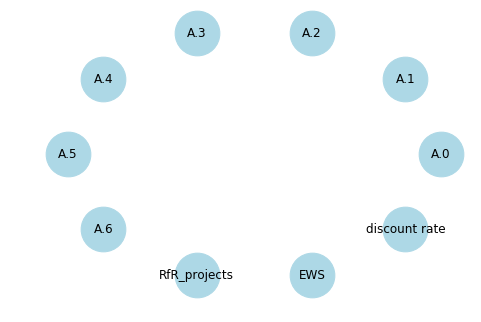

In [29]:
nx.draw_circular(G,
    node_color = "lightblue",
    node_size=2000,
    with_labels=True)

In [30]:
G.node["discount rate"]

{'value': 0}

In [31]:
G.node["EWS"]

{'days': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'evacuees': {0: 0.0, 1: 0.64, 2: 0.85, 3: 0.88, 4: 0.88},
 'type': 'measure'}

In [32]:
G.node['EWS']['evacuees']
# [
#                                                  G.node['EWS']['DaysToThreat']]

{0: 0.0, 1: 0.64, 2: 0.85, 3: 0.88, 4: 0.88}

In [33]:
G.node['EWS']['days']

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}